In [2]:
import cmocean.cm as cm
import h5py
import matplotlib as mpl
import matplotlib.colorbar as colorbar
import matplotlib.colors as mplcolours
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline

In [3]:
mesh = xr.open_dataset('~/MEOPAR/grid/mesh_mask201702.nc')

In [4]:
oil0d = pd.read_csv('/data/sallen/results/MIDOSS/ParticleNoTests/SB_2000_AKNS/resOilOutput.sro', sep='\s+', skiprows=4)
oil0d = oil0d.drop([0], axis=0)
length =len(oil0d)
oil0d = oil0d.drop([length-3, length-2, length-1, length], axis=0)

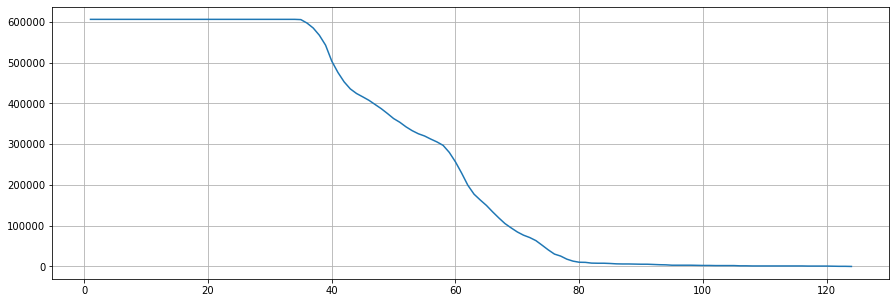

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
oil0d.Area.plot(ax=ax);
plt.grid();

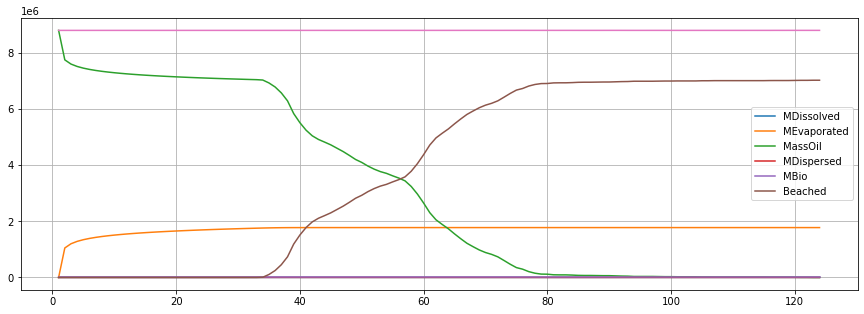

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
oil0d.MDissolved.plot();
oil0d.MEvaporated.plot();
oil0d.MassOil.plot();
oil0d.MDispersed.plot();
oil0d.MBio.plot()
massbeached = (oil0d.VolOilBeached*oil0d.Density/(1-oil0d.VWaterContent)
    *(1-oil0d.MWaterContent))

massbeached.plot(label="Beached")

plt.plot(oil0d.MDissolved + oil0d.MEvaporated + oil0d.MassOil 
         + massbeached + oil0d.MDispersed);


plt.legend();
plt.grid();

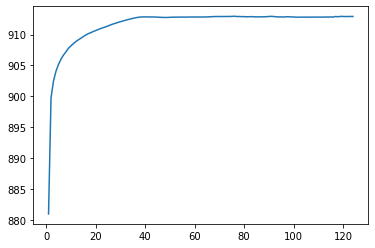

In [7]:
(oil0d.Density/(1-oil0d.VWaterContent)
    *(1-oil0d.MWaterContent)).plot();

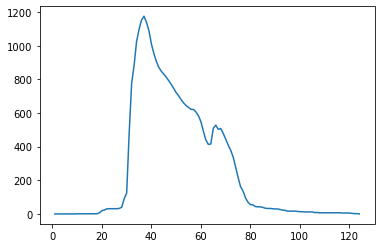

In [8]:
oil0d.MDispersed.plot();

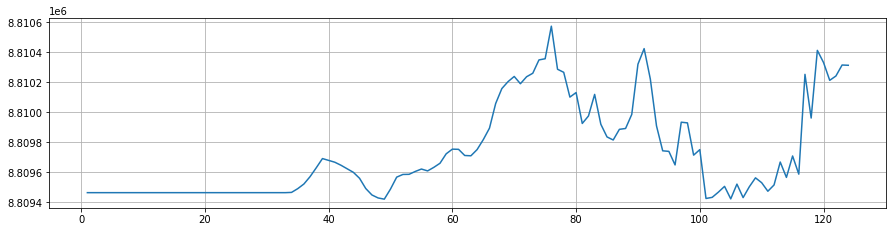

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3.5))
ax.plot(oil0d.MDissolved + oil0d.MEvaporated + oil0d.MassOil 
         + massbeached + oil0d.MDispersed + oil0d.MBio);
ax.grid();

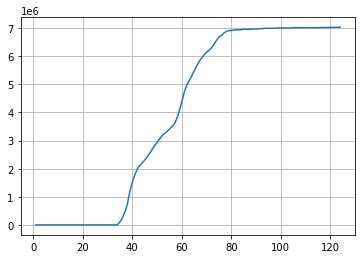

In [10]:
massbeached.plot(label="Beached");
plt.grid()

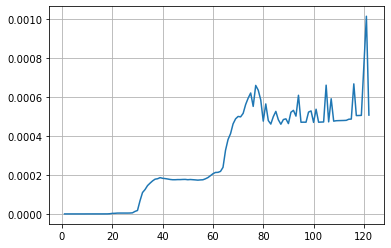

In [11]:
(oil0d.MDispersed/(oil0d.MDispersed + oil0d.MassOil))[:-2].plot()
plt.grid()

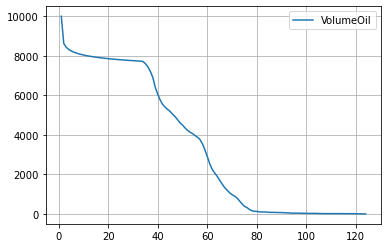

In [12]:
oil0d.VolumeOil.plot();
plt.legend();
plt.grid();

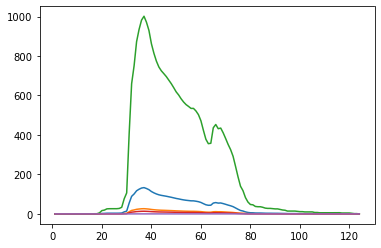

In [13]:
oil0d.AnalyteMass1.plot()
oil0d.AnalyteMass2.plot()
oil0d.AnalyteMass3.plot()
oil0d.AnalyteMass4.plot()
oil0d.AnalyteMass5.plot();

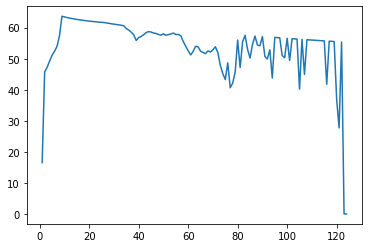

In [14]:
oil0d.Thickness.plot();

In [15]:
oilLag = xr.open_dataset('/data/sallen/results/MIDOSS/ParticleNoTests/SB_2000_AKNS/Lagrangian_SB_2000_AKNS_SB_2000_AKNS.nc')
oilLag

<xarray.Dataset>
Dimensions:                  (grid_x: 396, grid_x_latlon: 397, grid_y: 896, grid_y_latlon: 897, grid_z: 40, time: 124)
Coordinates:
  * time                     (time) datetime64[ns] 2018-01-15T00:30:00 ... 2018-01-20T03:30:00
  * grid_y                   (grid_y) int16 0 1 2 3 4 5 ... 891 892 893 894 895
  * grid_x                   (grid_x) int16 0 1 2 3 4 5 ... 391 392 393 394 395
  * grid_z                   (grid_z) int16 0 1 2 3 4 5 6 ... 34 35 36 37 38 39
  * grid_y_latlon            (grid_y_latlon) float32 0.0 1.0 2.0 ... 895.0 896.0
  * grid_x_latlon            (grid_x_latlon) float32 0.0 1.0 2.0 ... 395.0 396.0
Data variables:
    OilConcentration_2D      (time, grid_y, grid_x) float64 ...
    Thickness_2D             (time, grid_y, grid_x) float64 ...
    Dissolution_3D           (time, grid_z, grid_y, grid_x) float64 ...
    OilConcentration_3D      (time, grid_z, grid_y, grid_x) float64 ...
    OilWaterColumnOilVol_3D  (time, grid_z, grid_y, grid_x) float64 ...
    Latitude                 (grid_y_latlon, grid_x_latlon) float64 ...
    Longitude                (grid_y_latlon, grid_x_latlon) float64 ...
    Beaching_Time            (grid_y, grid_x) datetime64[ns] ...
    Beaching_Volume          (grid_y, grid_x) float64 ...
    Oil_Arrival_Time         (grid_y, grid_x) datetime64[ns] ...
Attributes:
    nco_openmp_thread_number:   1
    history:                    Mon Nov 23 22:11:06 2020: ncks -4 -L4 -A /loc...
    NCO:                        4.6.6
    history_of_appended_files:  Mon Nov 23 22:11:06 2020: Appended file /loca...

In [16]:
imin, imax = 200, 350
jmin, jmax = 150, 280

<xarray.DataArray 'OilWaterColumnOilVol_3D' ()>
array(7842.4125)
Coordinates:
    time     datetime64[ns] 2018-01-15T20:30:00


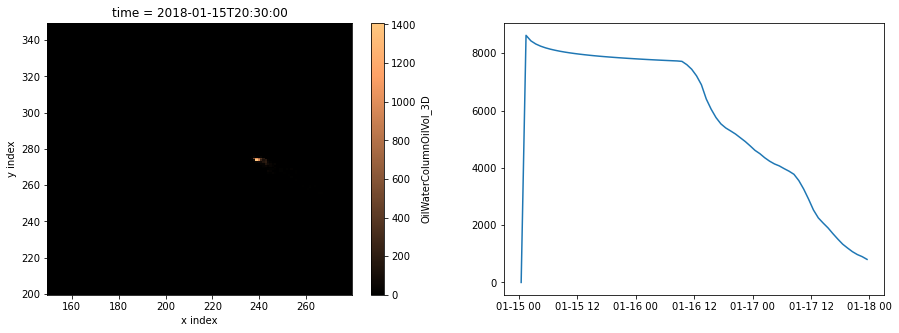

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
it = 20

field = oilLag.OilWaterColumnOilVol_3D[it]
(field[:, imin:imax , jmin:jmax].sum(axis=0)).plot(ax=axs[0], cmap='copper')
print (oilLag.OilWaterColumnOilVol_3D[it, :, imin:imax, jmin:jmax].sum(axis=0).sum(axis=0).sum(axis=0))

axs[1].plot(oilLag.time[0:72], oilLag.OilWaterColumnOilVol_3D[0:72].sum(axis=1).sum(axis=1).sum(axis=1)
           )

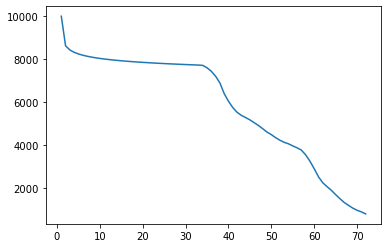

In [18]:
oil0d.VolumeOil[0:72].plot()

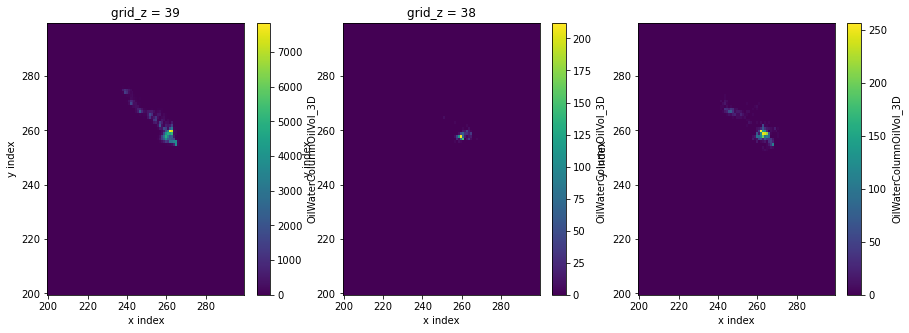

In [19]:
tmax = 20
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
oilLag.OilWaterColumnOilVol_3D[1:tmax+1, 39, 200:300, 200:300].sum(axis=0).plot(ax=axs[0]);
oilLag.OilWaterColumnOilVol_3D[1:tmax+1, 38, 200:300, 200:300].sum(axis=0).plot(ax=axs[1]);
oilLag.OilWaterColumnOilVol_3D[1:tmax+1, 0:38, 200:300, 200:300].sum(axis=0).sum(axis=0).plot(ax=axs[2]);

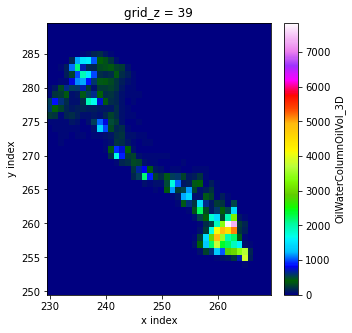

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
imin, imax = 250, 290
jmin, jmax = 230, 270
oilLag.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=ax, cmap='gist_ncar');

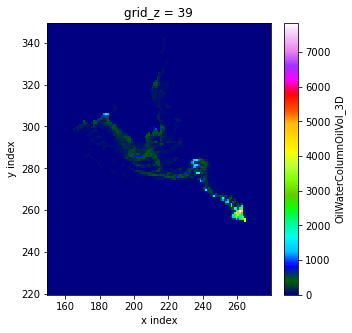

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
imin, imax = 220, 350
jmin, jmax = 150, 280
oilLag.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=ax, cmap='gist_ncar');

<xarray.DataArray 'Beaching_Volume' ()>
array(7702.70526808)


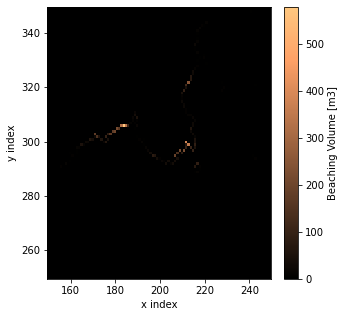

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
imin, imax = 250, 350
jmin, jmax = 150, 250
oilLag.Beaching_Volume[imin:imax , jmin:jmax].plot(ax=ax, cmap='copper')
print (oilLag.Beaching_Volume.sum(axis=0).sum(axis=0))

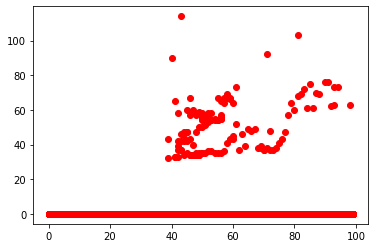

In [23]:
bt = np.array(oilLag.Beaching_Time[imin:imax, jmin:jmax] - oilLag.Beaching_Time[imin:imax, jmin:jmax].min())
plt.plot(bt/1e9/3600, 'ro');

In [24]:
watercolour = 'lightskyblue'
landcolour = 'papayawhip'
waterland_cmap = mplcolours.LinearSegmentedColormap.from_list('mycmap', [(0, watercolour),  (0.85, watercolour), 
                                                    (0.850001, landcolour), (1, landcolour)])
xs = range(jmin, jmax)
ys = range(imin, imax)
xx, yy = np.meshgrid(xs, ys)
mymask = oilLag.Beaching_Time[imin:imax, jmin:jmax] == oilLag.Beaching_Time[imin:imax, jmin:jmax].min()
days = np.ma.array(bt/1e9/86400., mask=mymask)

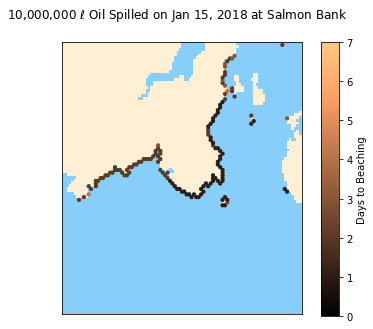

In [25]:
cnorm = mplcolours.Normalize(vmin=0, vmax=7)
mycmap = mpl.cm.copper
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_aspect(500/440.)
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.pcolormesh(1-mesh.tmask[0, 0, imin:imax, jmin:jmax], cmap=waterland_cmap)
ax.scatter(xx-jmin+1, yy-imin+1, s=10, c=days, cmap='copper', vmin=0, vmax=7, marker='o', edgecolors='face');
ax_cbar = fig.add_axes([0.9, 0.12, 0.05, 0.76])
cb = colorbar.ColorbarBase(ax=ax_cbar, cmap=mycmap, norm=cnorm);
cb.set_label('Days to Beaching')
fig.suptitle('10,000,000 $\ell$ Oil Spilled on Jan 15, 2018 at Salmon Bank');

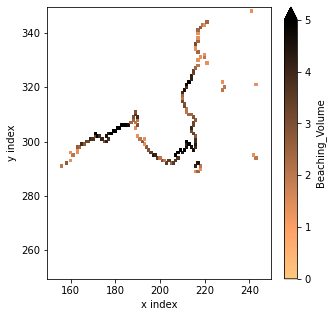

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
imin, imax = 250, 350
jmin, jmax = 150, 250
np.log(oilLag.Beaching_Volume[imin:imax , jmin:jmax]).plot(ax=ax, cmap='copper_r', 
                                                               vmax=5, vmin=0);